In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
def inverse(D, s, g):
  return 1/

In [6]:
n = 5
D = np.identity(5) * -np.random.rand(5)
s = np.zeros(n)
g = np.zeros(n)
#D[0,0] = D[0,0]/100

In [4]:
def avg_effect(M,t = 10000):
  n = M.shape[0]
  effects = []

  for i in range(t):
    a = np.random.rand(n)
    a = a/np.linalg.norm(a)
    effects.append(np.linalg.norm(np.matmul(M,a)))
  return effects



In [5]:
s = np.zeros(n)
g = np.zeros(n)
s[0] = 1
g[0] = 1
effects = avg_effect(np.linalg.inv(D - np.outer(g,s)))
plt.hist(effects,alpha = 0.2,)
s = np.zeros(n)
g = np.zeros(n)
s[2] = 1
g[2] = 1
effects = avg_effect(np.linalg.inv(D - np.outer(g,s)))
plt.hist(effects,alpha = 0.2)


NameError: name 'n' is not defined

In [ ]:
effects.shape

AttributeError: ignored

/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_62369/3500901533.py:31: UserWarning: Attempting to set identical bottom == top == 6.763711745325684 results in singular transformations; automatically expanding.
  plt.ylim(np.min(dx[0]),np.max(dx[0]))
/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_62369/3500901533.py:32: UserWarning: Attempting to set identical left == right == 6.763711745325684 results in singular transformations; automatically expanding.
  plt.xlim(np.min(dx[0]),np.max(dx[0]))


(6.4255261580594, 7.101897332591967)

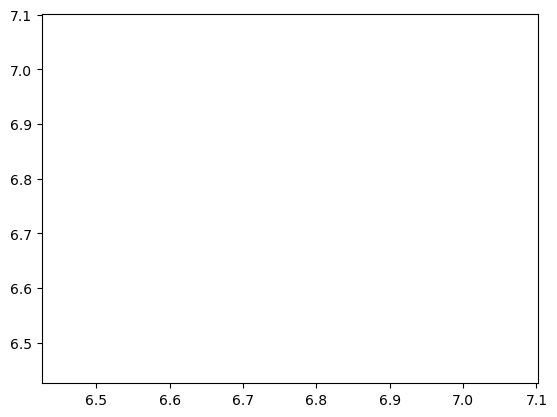

In [7]:
D = np.identity(2) * -np.random.rand(2)
D[0,0] = D[0,0]/5
Jkdk = (np.random.rand(2,1)-0.5)*2
Jkdk = Jkdk/np.linalg.norm(Jkdk,axis = 0)
s = np.ones(2)/np.sqrt(2)
g = np.ones(2)/np.sqrt(2)

dx = np.matmul(np.linalg.inv(D - np.outer(g,s)),Jkdk)
plt.scatter(dx[0],dx[1],marker ='.')

s = np.zeros(2)
g = np.zeros(2)

s[0] = 1
g = np.ones(2)/np.sqrt(2)

dx = np.matmul(np.linalg.inv(D - np.outer(g,s)),Jkdk)
plt.scatter(dx[0],dx[1],marker ='.')

s = np.zeros(2)
g = np.zeros(2)

s[1] = 1
g[1] = 1

dx = np.matmul(np.linalg.inv(D - np.outer(g,s)),Jkdk)
plt.scatter(dx[0],dx[1],marker ='.')

dx = np.matmul(np.linalg.inv(D),Jkdk)
plt.scatter(dx[0],dx[1],marker ='.')
plt.ylim(np.min(dx[0]),np.max(dx[0]))
plt.xlim(np.min(dx[0]),np.max(dx[0]))

In [ ]:
np.sum(np.sqrt(np.sum(np.matmul(np.linalg.inv(D),Jkdk)**2,axis = 0)))/Jkdk.shape[1]

3.838094852559078

In [8]:
mode_gap_results = []
evals0 = np.random.rand(2)
Jkdk = (np.random.rand(2,1)-0.5)*2
Jkdk = Jkdk/np.linalg.norm(Jkdk,axis = 0)
for d in np.logspace(0,2,20):
  evals = -np.array(evals0)
  evals[0] = evals[0]/d
  D = np.identity(2) * evals


  t = 100
  theta = np.linspace(0,2*np.pi,t)
  phi = np.linspace(0,2*np.pi,t)
  results = np.zeros((t,t))
  for i in tqdm(range(0,t)):
    for j in range(0,t):
      s = np.array([np.cos(theta[i]),np.sin(theta[i])])
      g = np.array([np.cos(phi[j]),np.sin(phi[j])])
      results[i,j] = np.sum(np.sqrt(np.sum(np.matmul(np.linalg.inv(D - np.outer(g,s)),Jkdk)**2,axis = 0)))/Jkdk.shape[1]
  mode_gap_results.append(np.min(results)/np.sum(np.sqrt(np.sum(np.matmul(np.linalg.inv(D),Jkdk)**2,axis = 0))))

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 190.35it/s]


In [ ]:
from matplotlib import rc
import matplotlib
rc('text', usetex=True)
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

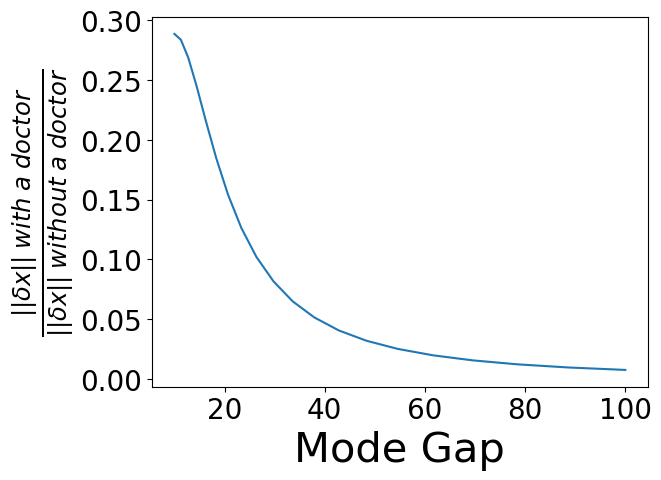

In [22]:
plt.rcParams['text.usetex'] = False

plt.plot(np.logspace(1,2,20),mode_gap_results)
plt.ylabel(r'$\frac{||\delta x|| \; with \; a \; doctor}{||\delta x|| \; without \; a \; doctor}$', fontsize=25)
plt.xlabel('Mode Gap', fontsize=30)
xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()

# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(20)  # Adjust the font size as desired
plt.savefig("fig1d.svg")
plt.show()


In [ ]:
Jkdk

array([[-0.21189855],
       [ 0.97729167]])

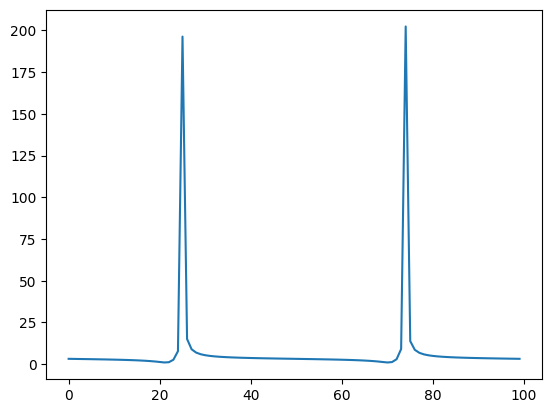

In [ ]:
plt.plot(results[0,:])

In [ ]:
d

10.0

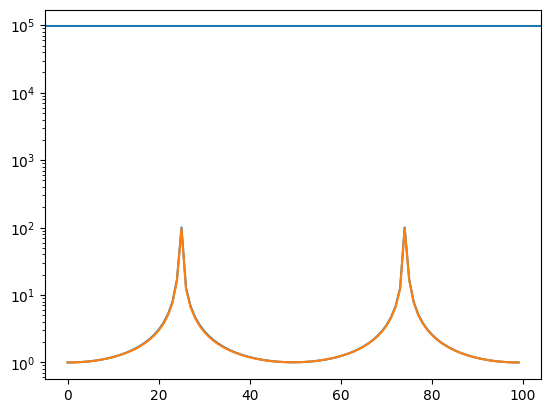

In [ ]:
plt.plot(results[0,:])
plt.plot(results[:,0])
plt.axhline(np.sum(np.sqrt(np.sum(np.matmul(np.linalg.inv(D),Jkdk)**2,axis = 0))))
plt.yscale('log')

In [ ]:
np.min(results)

5.131155677632946

In [ ]:
results[0,:]

array([  9.35215995,   9.37044356,   9.4092319 ,   9.46713094,
         9.54535397,   9.64806952,   9.78050495,   9.95093516,
        10.16658236,  10.42977311,  10.74924985,  11.14017176,
        11.61610625,  12.20518556,  12.92905246,  13.80538602,
        14.87286945,  16.19332088,  17.84218123,  19.94726715,
        22.6976026 ,  26.42807063,  31.7703734 ,  39.94981987,
        53.97364889,  83.60160963, 187.30337725, 746.13181981,
       123.8677785 ,  67.38801549,  46.23197936,  35.1925352 ,
        28.43921571,  23.86950485,  20.56462558,  18.08391527,
        16.16712115,  14.65815706,  13.46200163,  12.52041401,
        11.77958607,  11.1931764 ,  10.72359372,  10.34429898,
        10.04272526,   9.80711867,   9.62903043,   9.50169081,
         9.42088643,   9.38560929,   9.39302247,   9.43712983,
         9.51449769,   9.62805495,   9.7862136 ,  10.00218247,
        10.28809232,  10.65159406,  11.11319251,  11.69709092,
        12.44309314,  13.38181838,  14.54897507,  16.01